## Problem Statement¶
The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts by credit related information.

## Task Needed
Build a machine learning model that can classify the credit score.

## Notebook content
- Packages importing.
- Reading Data.
- Data Exploration.
- Data cleaning.
- Data Preprocessing.
- Modeling & Evaluation.
- prepare data for deployment.

In [1]:
## Import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading Data
train = pd.read_csv(r"E:\Data science 2022-Epsilon\Final project\train.csv")

C:\Users\Yazeed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
## Makre a copy of the original data so that if we changed the data
train_original = train.copy()

In [4]:
##There are 28 columns of features and 100000 rows of records.
print(train.shape)

(100000, 28)


In [5]:
train.head().transpose()

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [6]:
## get info about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
## check dataset columns
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
## check duplicated and didn't found 
train[ train.duplicated() ]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## Data Exploration & cleaning

In [9]:
## drop columns didn't effect in prediction for credit card scor
train.drop(['ID','Name','SSN','Month','Customer_ID'],axis=1,inplace=True)

In [10]:
## change the below columens to be numerical 

train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')
train['Num_of_Delayed_Payment']=pd.to_numeric(train['Num_of_Delayed_Payment'],errors='coerce')
train['Changed_Credit_Limit']=pd.to_numeric(train['Changed_Credit_Limit'],errors='coerce')
train['Outstanding_Debt']=pd.to_numeric(train['Outstanding_Debt'],errors='coerce')
train['Amount_invested_monthly']=pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Monthly_Balance']=pd.to_numeric(train['Monthly_Balance'],errors ='coerce')

train['Num_of_Loan']= pd.to_numeric(train['Num_of_Loan'],errors='coerce')

In [11]:
round(train.describe().transpose(),1)

,count,mean,std,min,25%,50%,75%,max
Annual_Income,93020.0,178579.0,1442878.4,7005.9,19435.6,37550.7,72843.4,24198062.0
Monthly_Inhand_Salary,84998.0,4194.2,3183.7,303.6,1625.6,3093.7,5957.4,15204.6
Num_Bank_Accounts,100000.0,17.1,117.4,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,100000.0,22.5,129.1,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,100000.0,72.5,466.4,1.0,8.0,13.0,20.0,5797.0
Num_of_Loan,95215.0,2.8,62.5,-100.0,1.0,3.0,5.0,1496.0
Delay_from_due_date,100000.0,21.1,14.9,-5.0,10.0,18.0,28.0,67.0
Num_of_Delayed_Payment,90254.0,31.0,227.0,-3.0,9.0,14.0,18.0,4397.0
Changed_Credit_Limit,97909.0,10.4,6.8,-6.5,5.3,9.4,14.9,37.0
Num_Credit_Inquiries,98035.0,27.8,193.2,0.0,3.0,6.0,9.0,2597.0


In [12]:
## check numerical columns
NUM_cols=train.select_dtypes(include=np.number).columns
NUM_cols

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [13]:
# check categorical column
cat_cols = train.select_dtypes(include='object').columns
cat_cols

Index(['Age', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [14]:
## Target Variable
train['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

<AxesSubplot:ylabel='Credit_Score'>

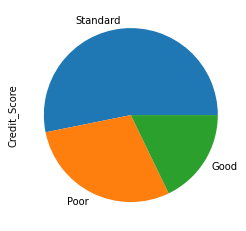

In [15]:
train['Credit_Score'].value_counts(normalize=True).plot.pie()

- 1st insights that 53% of credit score is standard.
- 29% represent poor credit csrd score.
- 18% represent Good credit card score.

## EDA for Categorical Data

In [16]:
## cleaing for Categorical data
train['Payment_Behaviour']= train['Payment_Behaviour'].replace("!@9#%8",np.nan)
train['Credit_Mix']= train['Credit_Mix'].replace("_",np.nan)
train['Occupation']= train['Occupation'].replace("_______",np.nan)

In [17]:
train['Type_of_Loan'].value_counts()

Not Specified                                                                                             1408
Credit-Builder Loan                                                                                       1280
Personal Loan                                                                                             1272
Debt Consolidation Loan                                                                                   1264
Student Loan                                                                                              1240
                                                                                                          ... 
Debt Consolidation Loan, Not Specified, Credit-Builder Loan, Student Loan, and Debt Consolidation Loan       8
Mortgage Loan, Student Loan, Mortgage Loan, Home Equity Loan, and Payday Loan                                8
Auto Loan, Student Loan, Personal Loan, Payday Loan, and Home Equity Loan                                    8
H

In [18]:
train['Type_of_Loan'] = train.Type_of_Loan.str.replace("and", "")
train['Type_of_Loan'] = train.Type_of_Loan.str.replace(" ", "")

In [19]:
cat_values = []
loan_cat = train['Type_of_Loan'].unique()
for i in loan_cat:
    for j in str(i).split(","):
        cat_values.append(j)

loan_types = set([x.strip(" ") for x in set(cat_values)])
loan_types = list(loan_types)
loan_types

['StudentLoan',
 'NotSpecified',
 'Credit-BuilderLoan',
 'DebtConsolidationLoan',
 'MortgageLoan',
 'PaydayLoan',
 'HomeEquityLoan',
 'nan',
 'AutoLoan',
 'PersonalLoan']

In [20]:
## the Type_of_Loan  it should rewrite in 9 cloumns ti handled and will increase data columns while it not big effect on credit card score
train.drop(['Type_of_Loan'],axis=1,inplace=True)

In [21]:
train['Credit_History_Age'].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [22]:
train['Credit_History_Age']=train['Credit_History_Age'].str.split(' ').str[0]
train['Credit_History_Age'] = pd.to_numeric(train['Credit_History_Age'], errors='coerce')
train['Credit_History_Age'].value_counts()

19.0    4784
18.0    4747
17.0    4718
16.0    4526
15.0    3854
20.0    3325
6.0     3054
13.0    3048
30.0    2982
32.0    2899
8.0     2814
29.0    2812
9.0     2803
31.0    2799
12.0    2790
23.0    2789
28.0    2767
24.0    2764
26.0    2727
22.0    2721
21.0    2708
11.0    2703
27.0    2622
10.0    2618
7.0     2575
25.0    2522
14.0    2360
5.0     2033
33.0    1106
1.0     1001
2.0      938
3.0      809
4.0      762
0.0      490
Name: Credit_History_Age, dtype: int64

In [23]:
train['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [24]:
train['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [25]:
train['Payment_of_Min_Amount'].value_counts(normalize=True)

Yes    0.52326
No     0.47674
Name: Payment_of_Min_Amount, dtype: float64

<AxesSubplot:title={'center':'Payment_of_Min_Amount'}>

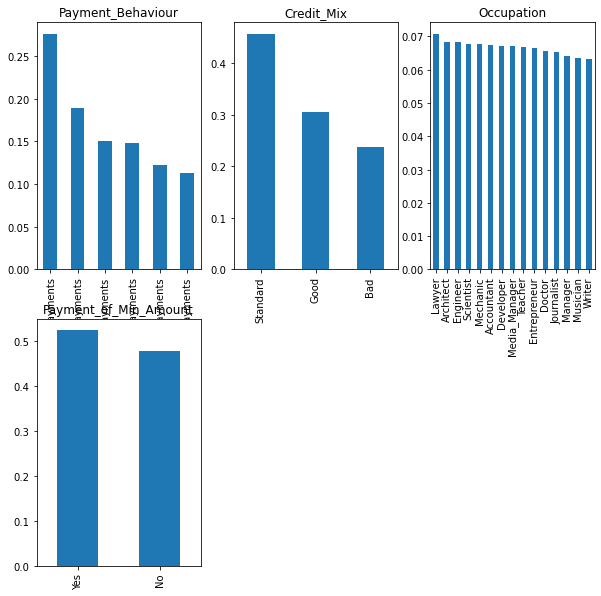

In [26]:
plt.figure(figsize=(10, 10))
plt.subplot(231)
train['Payment_Behaviour'].value_counts(normalize=True).plot.bar(title='Payment_Behaviour')

plt.subplot(232)
train['Credit_Mix'].value_counts(normalize=True).plot.bar(title='Credit_Mix')

plt.subplot(233)
train['Occupation'].value_counts(normalize=True).plot.bar(title='Occupation')

plt.subplot(234)
train['Payment_of_Min_Amount'].value_counts(normalize=True).plot.bar(title='Payment_of_Min_Amount')

In [27]:
train['Payment_Behaviour'].value_counts(normalize=True)

Low_spent_Small_value_payments      0.276115
High_spent_Medium_value_payments    0.189827
Low_spent_Medium_value_payments     0.150011
High_spent_Large_value_payments     0.148496
High_spent_Small_value_payments     0.122727
Low_spent_Large_value_payments      0.112825
Name: Payment_Behaviour, dtype: float64

In [28]:
train['Credit_Mix'].value_counts(normalize=True)

Standard    0.457102
Good        0.304956
Bad         0.237942
Name: Credit_Mix, dtype: float64

In [29]:
train['Occupation'].value_counts()

Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

## insights
- 27% of paymnet behaviour for customer is Low_spent_Small_value_payments.
- 45%  of credit mix is Standard.
- the occupation didn't found big diffrent between them.
- 52% of customer paid the min amomunt of pyamnet.

<AxesSubplot:xlabel='Payment_of_Min_Amount', ylabel='count'>

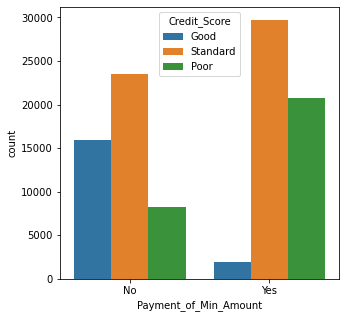

In [30]:
fig = plt.figure(figsize= (5,5))
sns.countplot(data=train,x='Payment_of_Min_Amount',hue='Credit_Score')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

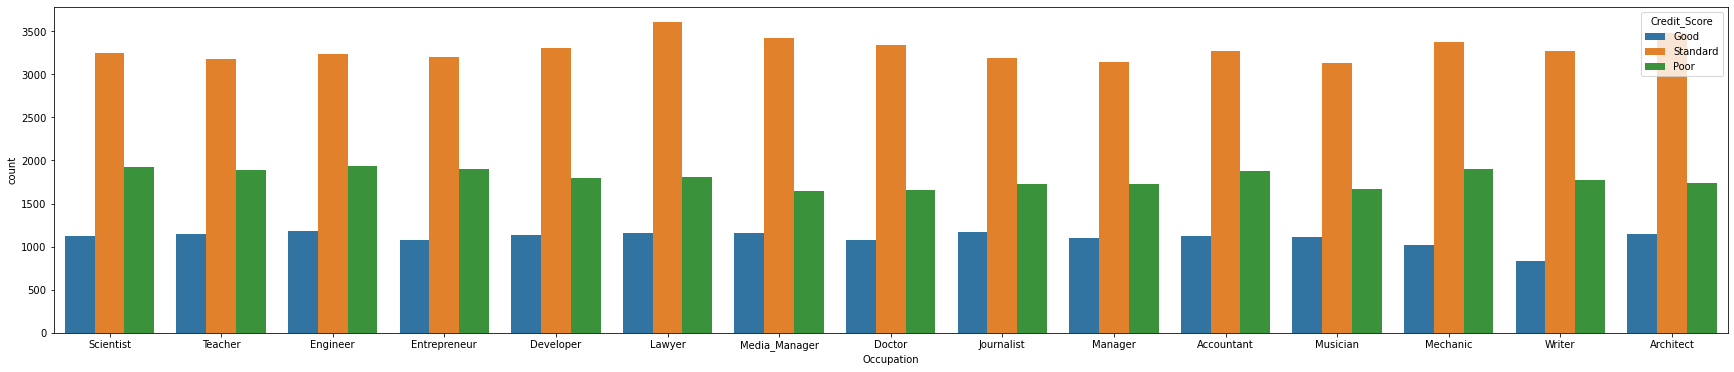

In [31]:
fig = plt.figure(figsize= (30,6))
sns.countplot(data=train,x="Occupation",hue="Credit_Score")

<AxesSubplot:xlabel='Payment_Behaviour', ylabel='count'>

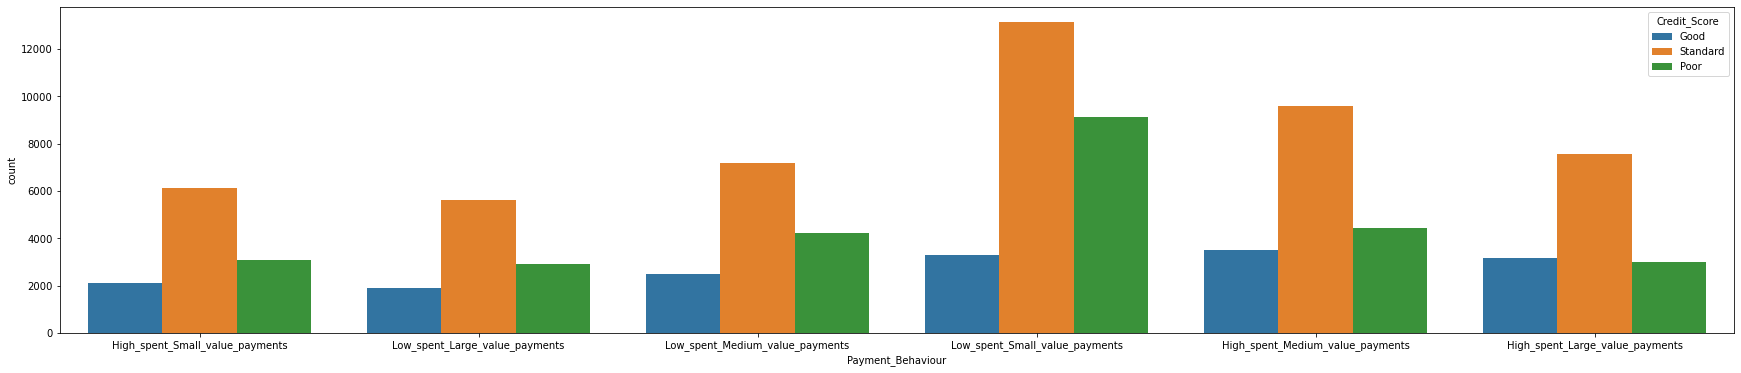

In [32]:
fig = plt.figure(figsize= (30,6))
sns.countplot(data=train,x="Payment_Behaviour",hue="Credit_Score")

<AxesSubplot:xlabel='Credit_Mix', ylabel='count'>

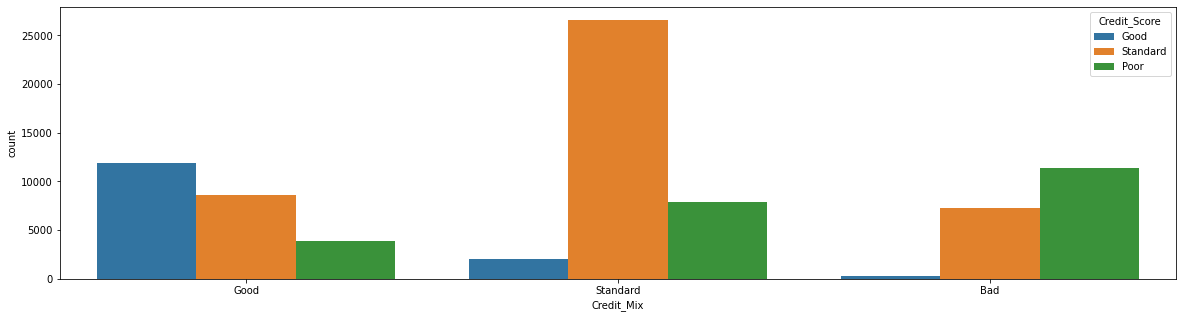

In [33]:
fig = plt.figure(figsize= (20,5))
sns.countplot(data=train,x="Credit_Mix",hue="Credit_Score")

## insights
- When credit mix it's indicator for credit score.
- Find in Occupation that no big effective in credit score.
- Paymnet behaviour effective in credit score as Low_spent_Small_value_payments will make bad credit score.
- Payment_of_Min_Amount not effective in credit score as althouge customer not pay min amount find it have good score.

In [34]:
##  i will drop as i found  that no big effective in credit score
train.drop(['Occupation'],axis=1,inplace=True)

In [35]:
NUM_cols=train.select_dtypes(include=np.number).columns
NUM_cols

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [36]:
## there are 17 columns numeric in dataset.
len(NUM_cols)

16

## Some cleaing for numeric data

In [37]:
train['Num_Bank_Accounts'].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
666         1
794         1
858         1
1178        1
1727        1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [38]:
train['Num_Bank_Accounts'].min()

-1

In [39]:
train['Num_Bank_Accounts'] = train['Num_Bank_Accounts'].apply(lambda x: abs(x))
train['Num_Bank_Accounts'].min()

0

In [40]:
## Num_Bank_Accounts included 4328 have zero values so i will replace it with 1 accounts 
train['Num_Credit_Card'].replace(0,1,inplace=True)

In [41]:
train['Age'].value_counts()

38       2833
28       2829
31       2806
26       2792
32       2749
         ... 
3291_       1
6135        1
4583_       1
381         1
267         1
Name: Age, Length: 1788, dtype: int64

In [42]:
train["Age"] = train["Age"].str.replace(r"_$", "", regex=True)
train['Age']=pd.to_numeric(train['Age'], errors ='coerce')

In [43]:
Age_500=train[train['Age']<0].index
train.drop(Age_500,inplace=True)

In [44]:
train['Age'].min()

14

In [45]:
Age_100=train[train['Age']>100].index
len(Age_100)

1890

In [46]:
train.drop(Age_100,inplace=True)

In [47]:
train["Age_Group"] = pd.cut(
    train.Age,
    bins=[14, 25, 30, 45, 55, 70, 100],
    labels=["14-25", "25-30", "30-45", "45-55", "55-70", "70-100"])
train["Age_Group"].value_counts()

30-45     41706
14-25     26183
25-30     14234
45-55     13559
55-70       362
70-100        5
Name: Age_Group, dtype: int64

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

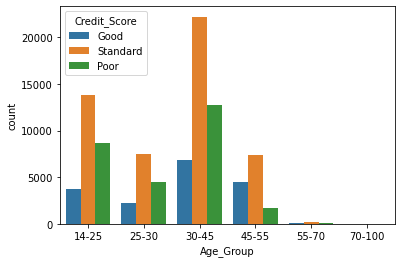

In [48]:
sns.countplot(data=train,x="Age_Group",hue="Credit_Score")

- Customers Between age of 30 and 45  represent the most category and most of them have standerd credit card score.

In [49]:
## i will dropped Age columns as i already replase it on Age_Group
train.drop(['Age'],axis=1,inplace=True)

In [50]:
## find that 10380 with value zero and 3876 with (-) in data and replce it to NAN and will handle it in missing data

print(len(train[train['Num_of_Loan']< 0]))

3771


In [51]:
## to get abslot number for - numbers.
train['Num_of_Loan'] = train['Num_of_Loan'].apply(lambda x: abs(x))
print(len(train[train['Num_of_Loan']< 0]))

0


In [52]:
train['Delay_from_due_date'].value_counts()

 15    3509
 13    3335
 8     3242
 14    3218
 10    3183
       ... 
 64      61
 65      55
-5       32
 66      31
 67      21
Name: Delay_from_due_date, Length: 73, dtype: int64

In [53]:
train['Delay_from_due_date'] = train['Delay_from_due_date'].apply(lambda x: abs(x))
train[train['Delay_from_due_date']<0]

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Group


In [54]:
train['Num_of_Delayed_Payment'].unique()

array([ 7.000e+00,        nan,  4.000e+00,  6.000e+00,  1.000e+00,
       -1.000e+00,  0.000e+00,  8.000e+00,  5.000e+00,  3.000e+00,
        9.000e+00,  1.200e+01,  1.500e+01,  1.700e+01,  1.000e+01,
        2.000e+00,  1.400e+01,  1.100e+01,  2.000e+01,  2.200e+01,
        1.300e+01,  1.600e+01,  1.800e+01,  1.900e+01,  2.300e+01,
        2.400e+01,  2.100e+01,  3.318e+03,  3.083e+03,  1.338e+03,
        2.600e+01,  3.104e+03,  2.500e+01,  1.106e+03,  8.340e+02,
        2.672e+03,  2.008e+03, -3.000e+00,  5.380e+02,  2.700e+01,
        3.478e+03,  2.420e+03,  7.070e+02,  7.080e+02,  3.815e+03,
        2.800e+01, -2.000e+00,  1.867e+03,  2.250e+03,  1.463e+03,
        2.882e+03,  1.941e+03,  2.655e+03,  2.628e+03,  1.320e+02,
        3.069e+03,  3.060e+02,  3.539e+03,  3.684e+03,  1.823e+03,
        4.128e+03,  1.946e+03,  8.270e+02,  2.297e+03,  2.566e+03,
        9.040e+02,  1.820e+02,  9.290e+02,  3.568e+03,  2.503e+03,
        1.552e+03,  2.812e+03,  1.697e+03,  3.764e+03,  8.510e

In [55]:
## to handle - values in num of delayed paymnet
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].apply(lambda x: abs(x))
train[train['Num_of_Delayed_Payment']<0]

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Group


In [56]:
train['Changed_Credit_Limit'].value_counts()

 8.22     133
 11.50    125
 11.32    122
 7.35     119
 10.06    119
         ... 
-0.16       1
-1.02       1
 32.07      1
 15.01      1
-4.79       1
Name: Changed_Credit_Limit, Length: 4366, dtype: int64

In [57]:
## handle (-) in data
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].apply(lambda x: abs(x))
train['Changed_Credit_Limit'].value_counts()

8.22     133
11.50    125
11.32    122
10.06    119
7.35     119
        ... 
20.50      1
31.49      1
22.77      1
26.29      1
31.37      1
Name: Changed_Credit_Limit, Length: 3749, dtype: int64

In [58]:
## ehnahce interest rate to be persent 
train['Interest_Rate']=train['Interest_Rate']/100

In [59]:
## check NUM data after cleaing
NUM_cols=train.select_dtypes(include=np.number).columns
NUM_cols

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

## check numericl data distribution. 

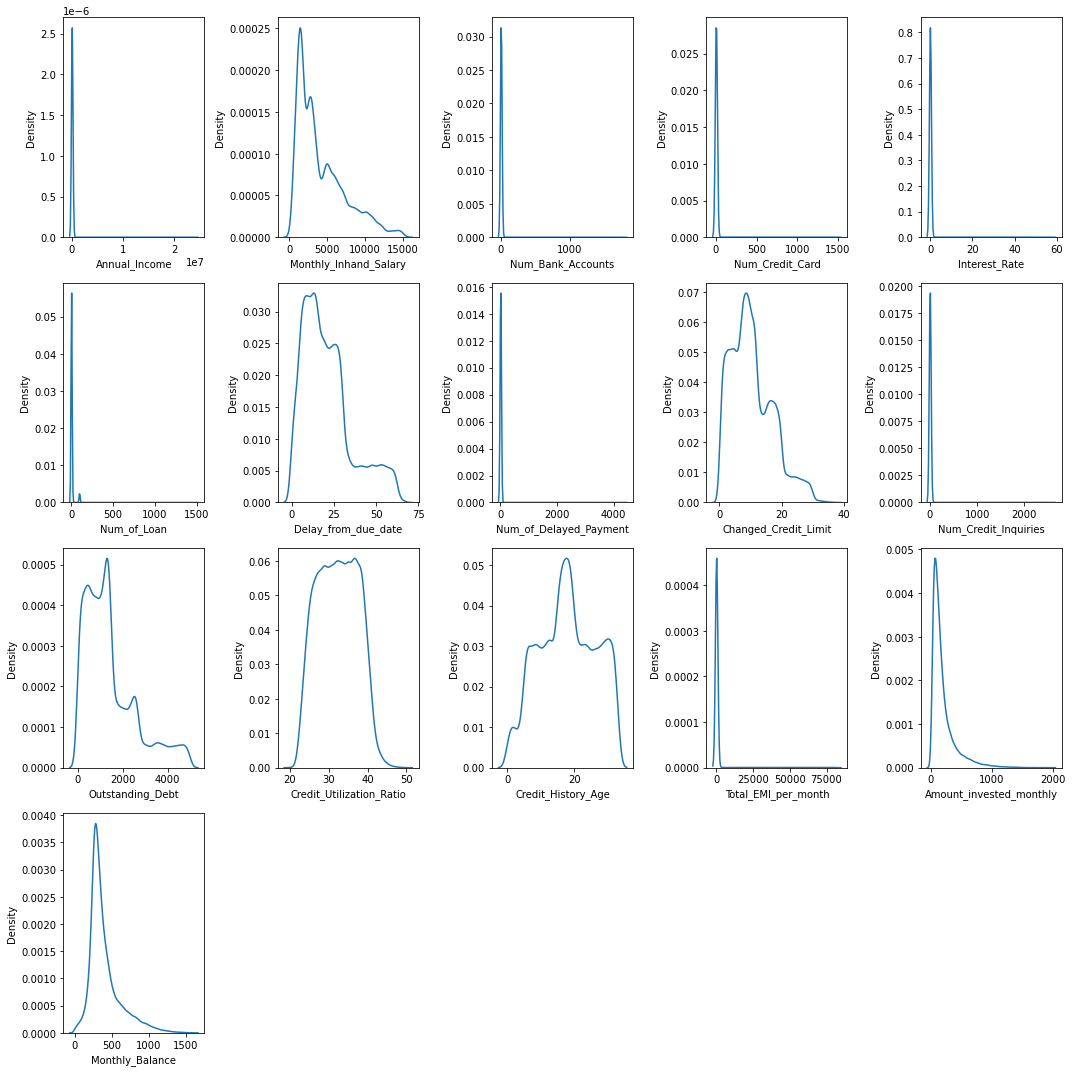

In [60]:
fig = plt.figure(figsize= (15,15))
for i, col in enumerate(NUM_cols):
    
    ax=fig.add_subplot(4,5,i+1)
    
    sns.kdeplot(x=train[col], ax=ax)
    
fig.tight_layout()  
plt.show()

## insights

- there are ourliers values in annual income and no normal distribuation.
- The monthly inhand salary represent that most ofdata less that 5000.
- We see a lot of outliers in the Num of bank accounts and it's not normal distribution.
- We see a lot of outliers in the Num credit card and it's not normal distribution.
- We see a lot of outliers in the Interest_Rate and it's not normal distribution.
- We see a lot of outliers in the Num of loan and it's not normal distribution.
- The Delay from due represent normal distribution.
- We find that most of the Num_of_Delayed_Payment in left it's means that the data not distribute normaly.
- The Changed_Credit_Limit represent normal distribution.
- We see a lot of outliers in the Num_Credit_Inquiries and it's not normal distribution.
- The Outstanding_Debt represent normal distribution.
- The Credit_Utilization_Ratio represent normal distribution.
- The Credit_History_Age represent normal distribution.
- We see a lot of outliers in Total_EMI_per_month and it's not normal distribution.
- We find that most of the Amount_invested_monthly in left it's means that the data not distribute normaly.
- We find that some of the Monthly_Balance in left it's means that the data not distribute normaly.

<AxesSubplot:>

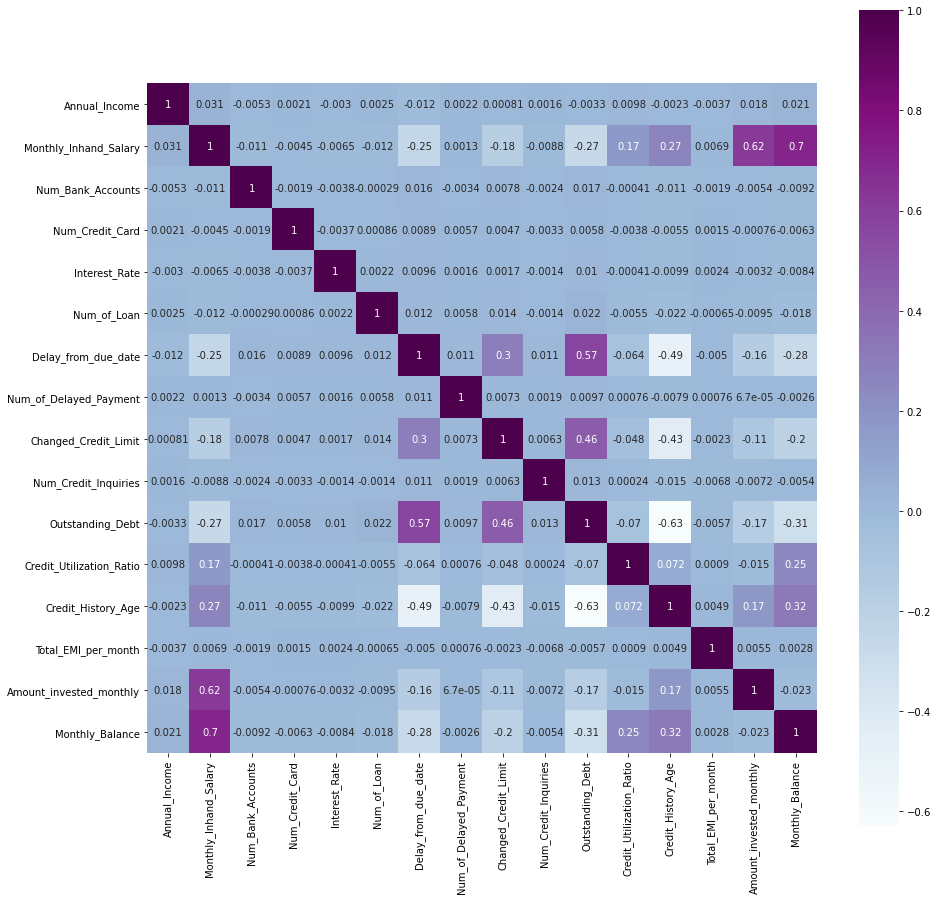

In [61]:
## check the correlation in data.
matrix = train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

##  Most correlated variables are:
- Correlation coefficient of 0.70 between Monthly_Inhand_Salary and Monthly Balance.
- Correlation coefficient of 0.62 between Monthly_Inhand_Salary and Amount invested monthly.
- Correlation coefficient of 0.57 between delay from due date and outstanding debt.


## Bivariate Analysis for numericl Data

In [62]:
train.groupby('Credit_Score').mean().transpose()

Credit_Score,Good,Poor,Standard
Annual_Income,189519.108894,154840.334675,188720.431616
Monthly_Inhand_Salary,5392.787349,3380.215909,4240.961691
Num_Bank_Accounts,15.095403,18.727814,16.936277
Num_Credit_Card,21.392830,23.812090,22.056279
Interest_Rate,0.732839,0.762232,0.703829
Num_of_Loan,10.287377,11.438693,10.746228
Delay_from_due_date,10.983753,29.756143,19.773026
Num_of_Delayed_Payment,26.563294,32.342482,31.709637
Changed_Credit_Limit,7.226161,11.125053,11.191566
Num_Credit_Inquiries,24.867441,31.009255,27.131049


- Find that annual income,monthly inhand salary,Delay from due date,changed credit limit,outstanding debt,credit history age,toatl EMI per month,amount invested and monthly balance it's most  elements effective in credit card score.

Credit_Score
Good        189519.108894
Poor        154840.334675
Standard    188720.431616
Name: Annual_Income, dtype: float64


<AxesSubplot:xlabel='Credit_Score'>

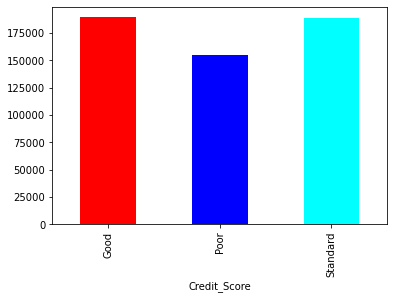

In [63]:
print(train.groupby('Credit_Score')['Annual_Income'].mean())

train.groupby('Credit_Score')['Annual_Income'].mean().plot.bar(color=['red', 'blue', 'cyan'])

- it can be inferred that Annual Income efficative in credit card score but not abig inductor.

Credit_Score
Good        23.253957
Poor        13.699338
Standard    18.533116
Name: Credit_History_Age, dtype: float64


<AxesSubplot:xlabel='Credit_Score'>

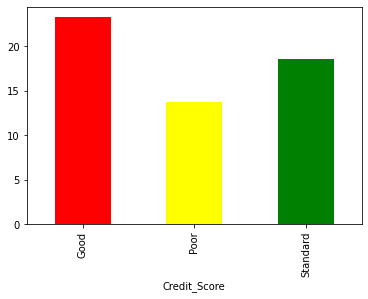

In [64]:
print(train.groupby('Credit_Score')['Credit_History_Age'].mean())

train.groupby('Credit_Score')['Credit_History_Age'].mean().plot.bar(color=['red', 'yellow','green'])

- it can be inferred that  increasing in Credit_History_Age represent strong indicator in credit card score.

              Monthly_Inhand_Salary  Total_EMI_per_month  Monthly_Balance  \
Credit_Score                                                                
Good                    5392.787349          1465.924795       475.685712   
Poor                    3380.215909          1345.813457       345.748611   
Standard                4240.961691          1401.003214       408.920381   

              Amount_invested_monthly  
Credit_Score                           
Good                       255.034203  
Poor                       160.262318  
Standard                   195.272215  


<AxesSubplot:xlabel='Credit_Score'>

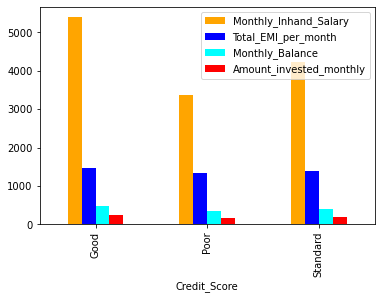

In [65]:
print(train.groupby('Credit_Score')[['Monthly_Inhand_Salary','Total_EMI_per_month','Monthly_Balance','Amount_invested_monthly']].mean())

train.groupby('Credit_Score')[['Monthly_Inhand_Salary','Total_EMI_per_month','Monthly_Balance','Amount_invested_monthly']].mean().plot.bar(color=['orange', 'blue','cyan','red'])

- Find that main element effective in credit card score is monthly inhand salary comparing with  monthly balance and amount invested monthly and ,Total_EMI_per_month.

              Num_of_Delayed_Payment  Delay_from_due_date
Credit_Score                                             
Good                       26.563294            10.983753
Poor                       32.342482            29.756143
Standard                   31.709637            19.773026


<AxesSubplot:xlabel='Credit_Score'>

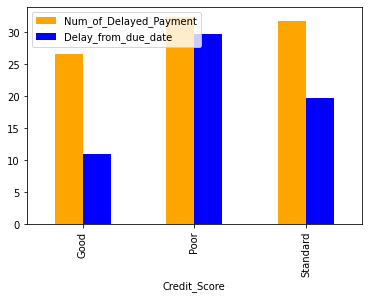

In [66]:
print(train.groupby('Credit_Score')[['Num_of_Delayed_Payment','Delay_from_due_date']].mean())

train.groupby('Credit_Score')[['Num_of_Delayed_Payment','Delay_from_due_date']].mean().plot.bar(color=['orange', 'blue'])

- the Delay of delayed due date have  strong indicator in credit card score comparing with num of dalyed paymnet as less than 10 days make customer have good credit score.

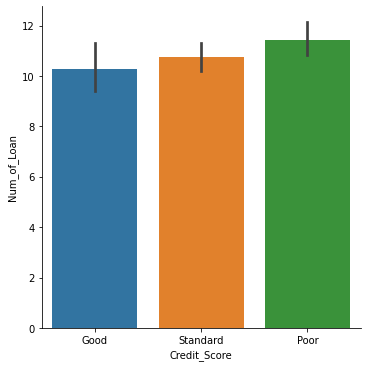

In [67]:
sns.catplot(data=train, kind="bar", x="Credit_Score", y="Num_of_Loan")

- find that increasing in number of lone will be indicator to poor score but not abig diffrent.

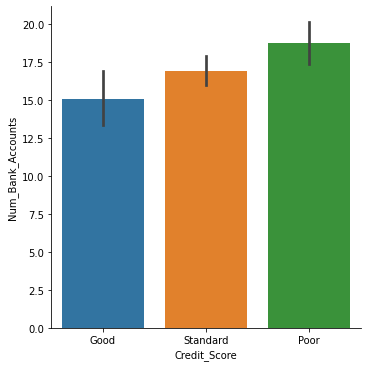

In [68]:
sns.catplot(data=train, kind="bar", x="Credit_Score", y="Num_Bank_Accounts")

- find that increasing in number of bank accounts will be indicator to poor score.

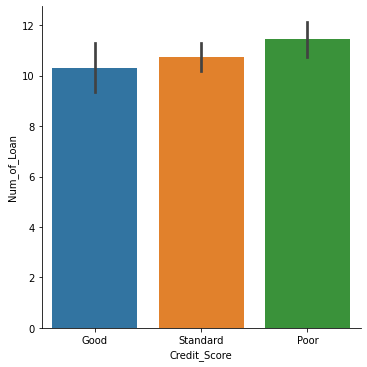

In [69]:
sns.catplot(data=train, kind="bar", x="Credit_Score", y="Num_of_Loan")

- find that increasing in number of loan accounts will be indicator to poor score.

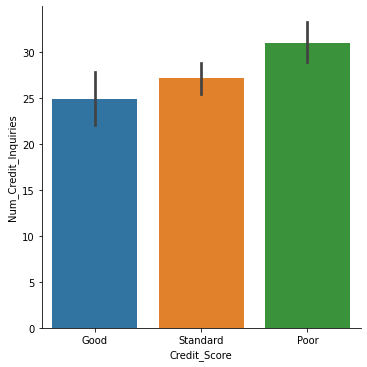

In [70]:
sns.catplot(data=train, kind="bar", x="Credit_Score", y="Num_Credit_Inquiries")

- Num_Credit_Inquiries effective on credit card score as when increas represent poor score.

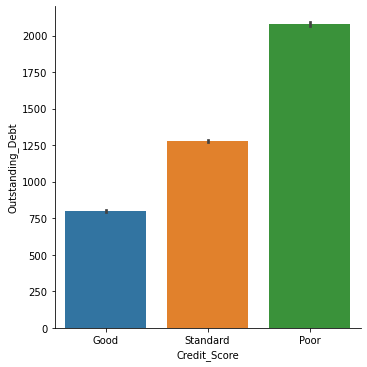

In [71]:
sns.catplot(data=train, kind="bar", x="Credit_Score", y="Outstanding_Debt")

- Outstanding_Debt represent that when outstanding debt is increase will give poor score and it big indicatot.

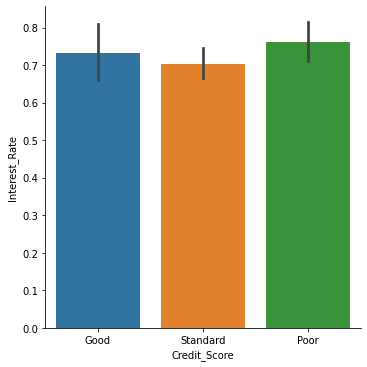

In [72]:
sns.catplot(data=train, kind="bar", x="Credit_Score", y="Interest_Rate")

- Interest_Rate represent that when it  increase will give poor score ..

In [73]:
# replacing Good,Poorand Standard  in Credit_Score variable with 0,1 and 2 respectively
train['Credit_Score'].replace('Good', 0, inplace=True)
train['Credit_Score'].replace('Poor', 1, inplace=True)
train['Credit_Score'].replace('Standard', 2, inplace=True)


In [74]:
train['Credit_Score'].unique()

array([0, 2, 1], dtype=int64)

In [75]:
from datasist.structdata import detect_outliers
## as we find that ourliers in data 15054 from 100000 about 15% so i will drop it
outliers_indices = detect_outliers(train, 0,NUM_cols)
len(outliers_indices)

15054

In [76]:
train.drop(outliers_indices, inplace=True)

## Missing Values

In [77]:
##check missing values
train.isnull().sum()

Annual_Income                5809
Monthly_Inhand_Salary       12320
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3952
Delay_from_due_date             0
Num_of_Delayed_Payment       8036
Changed_Credit_Limit         1716
Num_Credit_Inquiries         1591
Credit_Mix                  16566
Outstanding_Debt              822
Credit_Utilization_Ratio        0
Credit_History_Age           7524
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      7203
Payment_Behaviour            6237
Monthly_Balance               750
Credit_Score                    0
Age_Group                     975
dtype: int64

In [78]:
train.shape

(82170, 21)

In [79]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
train['Credit_Mix'] = imputer.fit_transform(train[['Credit_Mix']])
train['Payment_Behaviour'] = imputer.fit_transform(train[['Payment_Behaviour']])
train['Age_Group'] = imputer.fit_transform(train[['Age_Group']])

In [80]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [81]:
train['Annual_Income'] = imputer.fit_transform(train[['Annual_Income']])

In [82]:
train['Monthly_Inhand_Salary'] = imputer.fit_transform(train[['Monthly_Inhand_Salary']])

In [83]:
train['Num_of_Loan'] = imputer.fit_transform(train[['Num_of_Loan']]) 

In [84]:
train['Num_of_Delayed_Payment'] = imputer.fit_transform(train[['Num_of_Delayed_Payment']]) 

In [85]:
train['Changed_Credit_Limit'] = imputer.fit_transform(train[['Changed_Credit_Limit']])  

In [86]:
train['Num_Credit_Inquiries'] = imputer.fit_transform(train[['Num_Credit_Inquiries']]) 

In [87]:
train['Outstanding_Debt'] = imputer.fit_transform(train[['Outstanding_Debt']])   

In [88]:
train['Credit_History_Age'] = imputer.fit_transform(train[['Credit_History_Age']])

In [89]:
train['Amount_invested_monthly'] = imputer.fit_transform(train[['Amount_invested_monthly']])

In [90]:
train['Monthly_Balance'] = imputer.fit_transform(train[['Monthly_Balance']])

In [91]:
train.isnull().sum()

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Age_Group                   0
dtype: int64

In [92]:
train

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Group
0,19114.120000,1824.843333,3,4,0.03,4.0,3,7.000000,11.27,4.0,...,809.98,26.822620,22.000000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0,14-25
1,19114.120000,4112.707923,3,4,0.03,4.0,1,30.745447,11.27,4.0,...,809.98,31.944960,18.359537,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0,14-25
3,19114.120000,4112.707923,3,4,0.03,4.0,5,4.000000,6.27,4.0,...,809.98,31.377862,22.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0,14-25
4,19114.120000,1824.843333,3,4,0.03,4.0,6,30.745447,11.27,4.0,...,809.98,24.797347,22.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0,14-25
5,19114.120000,4112.707923,3,4,0.03,4.0,8,4.000000,9.27,4.0,...,809.98,27.262259,22.000000,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,0,14-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,39628.990000,3359.415833,4,6,0.07,2.0,20,6.000000,9.50,3.0,...,502.38,39.323569,31.000000,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,1,14-25
99995,39628.990000,3359.415833,4,6,0.07,2.0,23,7.000000,11.50,3.0,...,502.38,34.663572,31.000000,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,1,14-25
99996,39628.990000,3359.415833,4,6,0.07,2.0,18,7.000000,11.50,3.0,...,502.38,40.565631,31.000000,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,1,14-25
99998,39628.990000,3359.415833,4,6,0.07,2.0,20,30.745447,11.50,3.0,...,502.38,33.638208,31.000000,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,2,14-25


In [93]:
## copy Data for transformer
Final_trian = train.copy()

## work with categorical data

- Encode categorical features as an integer array on categorical (discrete) features.

In [94]:
from category_encoders import OneHotEncoder
cols=list(train.select_dtypes(include=object).columns)
OneHot_enc =OneHotEncoder(cols=cols,use_cat_names=True)
train= OneHot_enc.fit_transform(train)
train

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Monthly_Balance,Credit_Score,Age_Group_14-25,Age_Group_25-30,Age_Group_30-45,Age_Group_45-55,Age_Group_55-70,Age_Group_70-100
0,19114.120000,1824.843333,3,4,0.03,4.0,3,7.000000,11.27,4.0,...,0,0,312.494089,0,1,0,0,0,0,0
1,19114.120000,4112.707923,3,4,0.03,4.0,1,30.745447,11.27,4.0,...,0,0,284.629162,0,1,0,0,0,0,0
3,19114.120000,4112.707923,3,4,0.03,4.0,5,4.000000,6.27,4.0,...,0,0,223.451310,0,1,0,0,0,0,0
4,19114.120000,1824.843333,3,4,0.03,4.0,6,30.745447,11.27,4.0,...,0,0,341.489231,0,1,0,0,0,0,0
5,19114.120000,4112.707923,3,4,0.03,4.0,8,4.000000,9.27,4.0,...,0,0,340.479212,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,39628.990000,3359.415833,4,6,0.07,2.0,20,6.000000,9.50,3.0,...,0,0,410.256158,1,1,0,0,0,0,0
99995,39628.990000,3359.415833,4,6,0.07,2.0,23,7.000000,11.50,3.0,...,1,0,479.866228,1,1,0,0,0,0,0
99996,39628.990000,3359.415833,4,6,0.07,2.0,18,7.000000,11.50,3.0,...,0,0,496.651610,1,1,0,0,0,0,0
99998,39628.990000,3359.415833,4,6,0.07,2.0,20,30.745447,11.50,3.0,...,0,0,319.164979,2,1,0,0,0,0,0


## Feature Scaling

In [95]:
NUM_cols

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [96]:
from sklearn.preprocessing import StandardScaler
columns=['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']
scaler = StandardScaler()
scaler.fit(train[columns])
scaler.transform(train[columns])
train[columns] =scaler.transform(train[columns])


## Data split to Train and Test Sets

In [97]:
x = train.drop('Credit_Score', 1)
y = train.Credit_Score


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
print(x_train.shape)
print(x_test.shape)

(65736, 33)
(16434, 33)


In [100]:
print(y_train.shape) 
print(y_test.shape)

(65736,)
(16434,)


## Imbalanced Classes

- Data is Not 100% balanced as we see.

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto')
x_train, y_train = sm.fit_resample(x_train, y_train)

In [102]:
y_train.value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Credit_Score, dtype: float64

 ## Model Building & Evaluation

## Apply one-vs-all multi-class classification using sklearn Logistic Regression

## Model 1 LogisticRegression

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [104]:
# Train model
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [105]:
# Predict class
y_pred = lr.predict(x_test)
print(y_pred)

[1 1 2 ... 2 1 0]


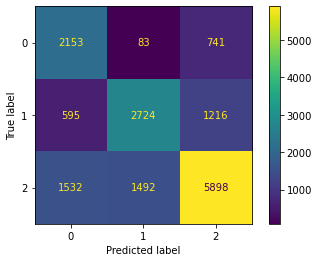

In [106]:
#Confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred,labels=lr.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [107]:
lgr_score = lr.score(x_train , y_train)
lgr_score_t = lr.score(x_test , y_test)
print(f"Train Score: {lgr_score * 100}")
print(f"Test Score: {lgr_score_t * 100}")

Train Score: 70.4305881476515
Test Score: 65.56529146890593


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.72      0.59      2977
           1       0.63      0.60      0.62      4535
           2       0.75      0.66      0.70      8922

    accuracy                           0.66     16434
   macro avg       0.63      0.66      0.64     16434
weighted avg       0.67      0.66      0.66     16434



## Model 2 KNeighborsClassifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

predicted = knn.predict(x_test)

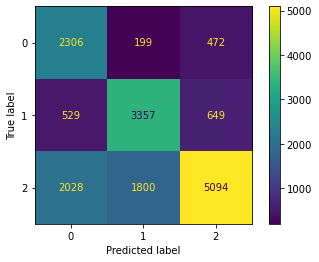

In [110]:
##confusion_matrix
cm=confusion_matrix(y_test,predicted,labels=knn.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [111]:
KNN_train_score = knn.score(x_train,y_train)
KNN_test_score = knn.score(x_test,y_test)
print(f"Train Score: {KNN_train_score * 100}")
print(f"Test Score: {KNN_test_score * 100}")

Train Score: 86.36067344582263
Test Score: 65.45576244371425


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.47      0.77      0.59      2977
           1       0.63      0.74      0.68      4535
           2       0.82      0.57      0.67      8922

    accuracy                           0.65     16434
   macro avg       0.64      0.70      0.65     16434
weighted avg       0.70      0.65      0.66     16434



## Modal 4  DecisionTreeClassifier

In [113]:
from sklearn.tree  import DecisionTreeClassifier
DE_Tree =DecisionTreeClassifier(max_features=16 ,   max_depth=14)
DE_Tree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=14, max_features=16)

In [114]:
DE_Tree_ypred=DE_Tree.predict(x_test)
DE_Tree_ypred

array([1, 1, 2, ..., 0, 1, 1], dtype=int64)

In [115]:
DE_Tree_score_train=DE_Tree.score(x_train , y_train)
print(DE_Tree_score_train *100)

80.51923864863858


In [116]:
DE_Tree_score_train=DE_Tree.score(x_test , y_test)
print(DE_Tree_score_train * 100)

71.14518680783742


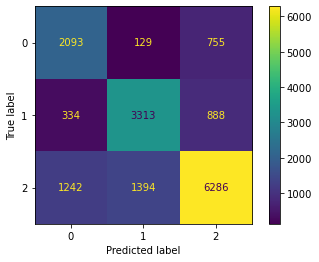

In [117]:
##confusion_matrix
cm=confusion_matrix(y_test,DE_Tree_ypred,labels=DE_Tree.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DE_Tree.classes_)
disp.plot()
plt.show()

In [119]:
print(classification_report(y_test, DE_Tree_ypred))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63      2977
           1       0.69      0.73      0.71      4535
           2       0.79      0.70      0.75      8922

    accuracy                           0.71     16434
   macro avg       0.68      0.71      0.69     16434
weighted avg       0.72      0.71      0.71     16434



C:\Users\Yazeed\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


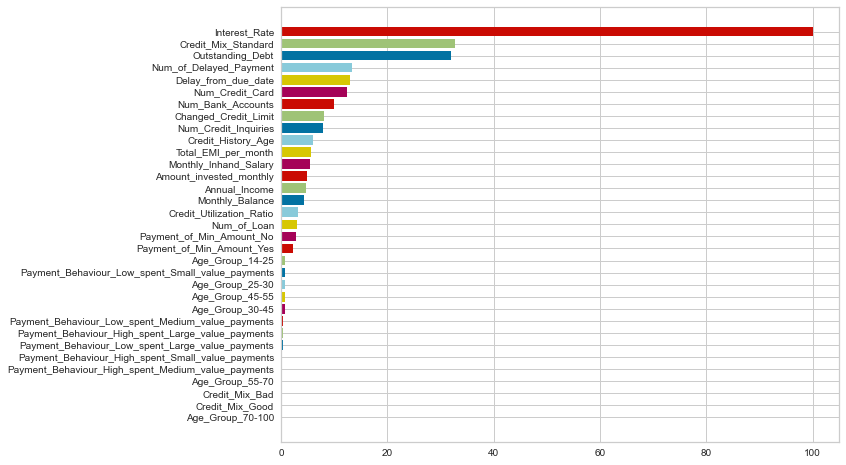

In [127]:
from yellowbrick.model_selection import FeatureImportances
fig , ax = plt.subplots(figsize=(10,8))
tree_viz = FeatureImportances(DE_Tree)
tree_viz.fit(x_train,y_train)
fig.savefig('DTreeFeatureImp.png',dpi=300)
plt.show()

## XGboost

In [120]:
import xgboost as xgb
from xgboost import XGBClassifier

In [121]:
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'multi:softmax' , n_estimators= 5, random_state=42)

In [122]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, objective='multi:softmax', predictor='auto', ...)

In [123]:
preds = xgb.predict(x_test)

In [124]:
xgb_score_train=xgb.score(x_train , y_train)
print(xgb_score_train *100)

73.01095094423958


In [125]:
xgb_score_test=xgb.score(x_test , y_test)
print(xgb_score_test *100)

67.83497626871122


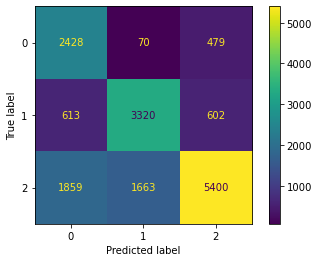

In [126]:
##confusion_matrix
cm=confusion_matrix(y_test,preds,labels=xgb.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [127]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62      2977
           1       0.66      0.73      0.69      4535
           2       0.83      0.61      0.70      8922

    accuracy                           0.68     16434
   macro avg       0.66      0.72      0.67     16434
weighted avg       0.72      0.68      0.68     16434



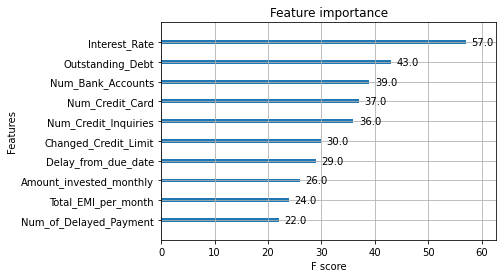

In [128]:
# top 10  most important features
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10) 
plt.show()

## Modal RandomForestClassifier

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifierScikit
RFC = RandomForestClassifier()
rf_scikit = RandomForestClassifierScikit(n_estimators=100, max_features=0.80, max_depth=10, min_samples_split=20)


In [131]:
 rf_scikit.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=0.8, min_samples_split=20)

In [132]:
train_preds = rf_scikit.predict(x_test)
train_preds

array([1, 1, 2, ..., 0, 1, 0], dtype=int64)

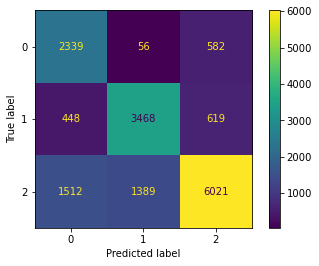

In [133]:
##confusion_matrix
cm=confusion_matrix(y_test,train_preds,labels=rf_scikit.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_scikit.classes_)
disp.plot()
plt.show()

In [134]:
train_preds_score = rf_scikit.score(x_train,y_train)
print(train_preds_score* 100)
test_preds_score = rf_scikit.score(x_test,y_test)
print(test_preds_score* 100)

76.71993146347823
71.97273944261896


In [135]:
print(classification_report(y_test, train_preds))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64      2977
           1       0.71      0.76      0.73      4535
           2       0.83      0.67      0.75      8922

    accuracy                           0.72     16434
   macro avg       0.69      0.74      0.71     16434
weighted avg       0.75      0.72      0.72     16434



## Features selection

Outstanding_Debt             35.506926
Credit_Mix_Standard          14.702078
Interest_Rate                12.325321
Num_Bank_Accounts             6.164125
Num_Credit_Card               5.932278
Delay_from_due_date           5.580292
Credit_Mix_Good               3.275093
Changed_Credit_Limit          2.615544
Num_Credit_Inquiries          2.289677
Payment_of_Min_Amount_Yes     2.276867
dtype: float64

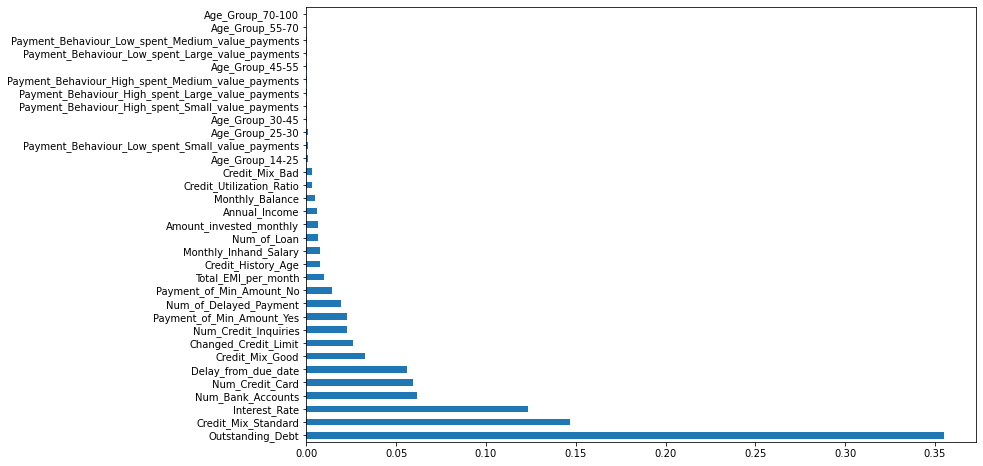

In [136]:
importances = pd.Series(rf_scikit.feature_importances_, index=x.columns).sort_values(ascending=False)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))
important_FET= importances.head(10)
important_FET*100

- These are the most important features for model learning in the order of  interest Rate ,total monthly EMI, outstanding debt, and amount investment monthly,number of bank accounts.....etc.
- Most of the occpation ,Payment_Behaviour,paymnet of min amount values Range values did not affect model learning.


## Hyper-parameter Tuning for XGboost¶


In [143]:
from sklearn.model_selection import RandomizedSearchCV
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 100, 20))}
Random_search = RandomizedSearchCV(XGBClassifier(random_state=1), paramgrid)

In [144]:
Random_search.fit(x_train, y_train)      

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=1, ...),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'n_estimators': [1, 21, 41, 61, 81]})

In [145]:
print("Best Score:", Random_search.best_score_ *100)  
print("Best Hyperparameters:", Random_search.best_params_)

Best Score: 84.78609736600615
Best Hyperparameters: {'n_estimators': 61, 'max_depth': 17}


## Hyper-parameter Tuning for RondomForest

In [146]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 100, 20))}
Random_forest = RandomizedSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [147]:
Random_forest.fit(x_train, y_train)  

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'n_estimators': [1, 21, 41, 61, 81]})

In [148]:
print("Best Score:", Random_forest.best_score_ *100)
print("Best Hyperparameters:", Random_forest.best_params_)

Best Score: 78.57490752650878
Best Hyperparameters: {'n_estimators': 81, 'max_depth': 17}


## Conclusions

##### - Used several classification models to fit our data and i found that XGboot it best model with accurcy 85% after tuning and recall 82%.


In [149]:
import pickle as pkl

## Modling Save 

In [150]:
pkl.dump(Random_search,open('XGboot.pkl','wb'))

## Modling Load

In [151]:
loaded_model=pkl.load(open('XGboot.pkl','rb'))    

In [152]:
Final_trian

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age_Group
0,19114.120000,1824.843333,3,4,0.03,4.0,3,7.000000,11.27,4.0,...,809.98,26.822620,22.000000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0,14-25
1,19114.120000,4112.707923,3,4,0.03,4.0,1,30.745447,11.27,4.0,...,809.98,31.944960,18.359537,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0,14-25
3,19114.120000,4112.707923,3,4,0.03,4.0,5,4.000000,6.27,4.0,...,809.98,31.377862,22.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0,14-25
4,19114.120000,1824.843333,3,4,0.03,4.0,6,30.745447,11.27,4.0,...,809.98,24.797347,22.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0,14-25
5,19114.120000,4112.707923,3,4,0.03,4.0,8,4.000000,9.27,4.0,...,809.98,27.262259,22.000000,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,0,14-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,39628.990000,3359.415833,4,6,0.07,2.0,20,6.000000,9.50,3.0,...,502.38,39.323569,31.000000,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,1,14-25
99995,39628.990000,3359.415833,4,6,0.07,2.0,23,7.000000,11.50,3.0,...,502.38,34.663572,31.000000,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,1,14-25
99996,39628.990000,3359.415833,4,6,0.07,2.0,18,7.000000,11.50,3.0,...,502.38,40.565631,31.000000,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,1,14-25
99998,39628.990000,3359.415833,4,6,0.07,2.0,20,30.745447,11.50,3.0,...,502.38,33.638208,31.000000,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,2,14-25


## Transformers

In [153]:
from sklearn.compose import make_column_transformer

In [154]:
def preprocess(Final_trian,num, cat):
    # Define transformers
    
    OneHot_enc = OneHotEncoder()
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (OneHot_enc, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    transformer.fit_transform(Final_trian[num+cat])
    return transformer
   
# Fitting& transformers Data

numerical = list(Final_trian.select_dtypes(include=['number']).columns)
my_col= 'Credit_Score'
numerical.remove(my_col)

important_cat = list(Final_trian.select_dtypes(include=['object']).columns) 

transformer = preprocess(Final_trian, numerical, important_cat)    

In [155]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['Annual_Income', 'Monthly_Inhand_Salary',
                                  'Num_Bank_Accounts', 'Num_Credit_Card',
                                  'Interest_Rate', 'Num_of_Loan',
                                  'Delay_from_due_date',
                                  'Num_of_Delayed_Payment',
                                  'Changed_Credit_Limit',
                                  'Num_Credit_Inquiries', 'Outstanding_Debt',
                                  'Credit_Utilization_Ratio',
                                  'Credit_History_Age', 'Total_EMI_per_month',
                                  'Amount_invested_monthly',
                                  'Monthly_Balance']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Credit_Mix', 'Payment_of_Min_Amount',
                                  'Payment_Behaviour', 'Age_Group'])],
                  verbose_feature_names_out=False)

In [156]:
## Transformer Saving
pkl.dump(transformer, open("transformer.pkl", 'wb'))

In [157]:
## Transformer load
trans=pkl.load(open('transformer.pkl', 'rb')) 
    

In [158]:
loaded_model=pkl.load(open('XGboot.pkl','rb')) 